# [UW-Madison GI Tract Image Segmentation](https://www.kaggle.com/competitions/uw-madison-gi-tract-image-segmentation/)
> Track healthy organs in medical scans to improve cancer treatment

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/27923/logos/header.png?t=2021-06-02-20-30-25">

# ⚽ Methodlogy
<img src="https://i.ibb.co/sgsPf4v/Capture.png" width=800>
<img src="https://i.ibb.co/KKtZ7Gn/Picture1-3d.png" width=500>

* In this notebook I'll demonstrate how to train using 2.5D images with **Unet** model using PyTorch.
* 2.5D images take leverage of the extra depth information like our typical RGB image.
* In this notebook I'll be using 3 channels with 2 strides for 2.5D images
* Instead of Resize I'll be using Padding to avoid info loss.
* For mask I'll be using pre-computed 2.5D images & mask from [here](https://www.kaggle.com/code/awsaf49/uwmgi-2-5d-stride-2-dataset)
* As there are overlaps between **Stomach**, **Large Bowel** & **Small Bowel** classes, this is a **MultiLabel Segmentation** task, so final activaion should be `sigmoid` instead of `softmax`.
* For data split I'll be using **StratifiedGroupFold** to avoid data leakage due to `case` and to stratify `empty` and `non-empty` mask cases.
* You can play with different models and losses.

## Please Upvote if you Find this Useful :)

# 📒 Notebooks
📌 **2.5D**:
* Train: [UWMGI: 2.5D [Train] [PyTorch]](https://www.kaggle.com/awsaf49/uwmgi-2-5d-train-pytorch/)
* Infer: [UWMGI: 2.5D [Infer] [PyTorch]](https://www.kaggle.com/awsaf49/uwmgi-2-5d-infer-pytorch/)
* Data: [UWMGI: 2.5D stride=2 Data](https://www.kaggle.com/code/awsaf49/uwmgi-2-5d-stride-2-data/)
* Dataset: [UWMGI: 2.5D stride=2 Dataset](https://www.kaggle.com/datasets/awsaf49/uwmgi-25d-stride2-dataset)

📌 **UNet**:
* Train: [UWMGI: Unet [Train] [PyTorch]](https://www.kaggle.com/code/awsaf49/uwmgi-unet-train-pytorch/)
* Infer: [UWMGI: Unet [Infer] [PyTorch]](https://www.kaggle.com/code/awsaf49/uwmgi-unet-infer-pytorch/)

📌 **MMDetection**:
* Train: [UWMGI: MMDetection [Train]](https://www.kaggle.com/code/awsaf49/uwmgi-mmdetection-train)

📌 **Data/Dataset**:
* Data: [UWMGI: Mask Data](https://www.kaggle.com/datasets/awsaf49/uwmgi-mask-data)
* Dataset: [UWMGI: Mask Dataset](https://www.kaggle.com/datasets/awsaf49/uwmgi-mask-dataset)

# 🛠 Install Libraries

In [2]:
#!pip install kaggle --force
install='N'
if install=='Y':

  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !pip install segmentation_models_pytorch
  #!mkdir ../input/ 
  #!mkdir ../input/gi-dataset-fold
  #!mkdir ../input/uwmgi-25d-stride2-dataset
  #!kaggle datasets download -d awsaf49/uwmgi-25d-stride2-dataset
  #!kaggle datasets download -d jaideepvalani/gi-trac-public-part1
  !kaggle datasets download -d jaideepvalani/gi-public-partial
  !pip install -q segmentation_models_pytorch
  !pip install -qU wandb
  !pip install -q scikit-learn==1.0
  !pip install albumentations --force
  !unzip -q  /content/gi-public-partial.zip -d  .
  !rm -rf /content/gi-public-partial.zip
  !pip install opencv-python-headless==4.5.2.52
  !pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.9 MB/s 
     |████████████████████████████████| 58 kB 7.2 MB/s 
     |████████████████████████████████| 376 kB 28.7 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=13e5b24fcfd8843c02c16f64dc19204732bf9cbd9e6564c08fcd63446d0056b8
  Stored in directory: /root/.cache/pip/wheels/90/6b/0c/f0ad36d00310e65390b0d4c9218ae6250ac579c92540c9097a
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=657497bd1b0dd373d44e176b0b8870326a4bf8bdc013a919d2d7825fe3c58764
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels
100% 4.62G/4.62G [00:39<00:00, 122MB/s]
100% 4.62G/4.62G [00:39<00:00, 125MB/s]
     |██████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
'''
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c uw-madison-gi-tract-image-segmentation  
'''
#!mkdir ../input/ 
#!mkdir ../input/uwmgi-25d-stride2-dataset
#!unzip -q  /content/gi-trac-public-part1.zip -d  .
#!rm -rf /content/gi-trac-public-part1.zip

'\n!mkdir -p ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!kaggle competitions download -c uw-madison-gi-tract-image-segmentation  \n'

In [2]:
import os
#len(os.listdir('../input/uwmgi-25d-stride2-dataset/input/uwmgi-25d-stride2-dataset/images/images'))
#!rm -rf ../input/uwmgi-25d-stride2-dataset/input/uwmgi-25d-stride2-dataset/

In [3]:

#!unzip -q /content/uwmgi-25d-stride2-dataset.zip -d  ../input/uwmgi-25d-stride2-
!nvidia-smi

Sat Jun  4 05:27:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import sys
sys.path.append('/content/')

In [2]:
'''
# Create a ZipFile Object and load program.zip in it
with ZipFile('/content/uwmgi-25d-stride2-dataset1.zip', 'r') as zipObj:
   # Get a list of all archived file names from the zip
   listOfFileNames = zipObj.namelist()
   # Iterate over the file names
   files=[]
   for i,fileName in enumerate(listOfFileNames):
       # Check filename endswith csv
       
       if i<5000:
         files.append(fileName)
       if fileName.endswith('.npy'):
           # Extract a single file from zip
           zipObj.extract(fileName, '../input/uwmgi-25d-stride2-dataset/')
           with ZipFile("/content/uwmgi-25d-stride2-dataset.zip", "a") as z:
                z.remove(fileName)       
'''     

'\n# Create a ZipFile Object and load program.zip in it\nwith ZipFile(\'/content/uwmgi-25d-stride2-dataset1.zip\', \'r\') as zipObj:\n   # Get a list of all archived file names from the zip\n   listOfFileNames = zipObj.namelist()\n   # Iterate over the file names\n   files=[]\n   for i,fileName in enumerate(listOfFileNames):\n       # Check filename endswith csv\n       \n       if i<5000:\n         files.append(fileName)\n       if fileName.endswith(\'.npy\'):\n           # Extract a single file from zip\n           zipObj.extract(fileName, \'../input/uwmgi-25d-stride2-dataset/\')\n           with ZipFile("/content/uwmgi-25d-stride2-dataset.zip", "a") as z:\n                z.remove(fileName)       \n'

In [3]:
import subprocess



In [4]:
#!zip /content/uwmgi-25d-stride2-dataset.zip --out part1.zip part2.zip part3.zip -s 3g 

In [5]:
import wandb

In [6]:
install='N'
if install=='Y':
  
  #!mkdir ./input/train_512
  #!mkdir ./input/mask_512
  for outputFilename in os.listdir('.') :
                        
    if 'zip' in outputFilename:

      #zfobj = zipfile.ZipFile(outputFilename)

      with ZipFile(outputFilename, 'r') as zipObj:
    # Extract all the contents of zip file in different directory
          
          #uncompressed = zfobj.read(name)

                  # save uncompressed data to disk
          if 'mask' in outputFilename:
            ext_path = "./input/mask_512/"  

          else:
            ext_path = "./input/train_512/"  
          print(ext_path,outputFilename)
          #print "Saving extracted file to ",outputFilename
          zipObj.extractall(ext_path)  
      os.remove(outputFilename)

# 📚 Import Libraries 

In [7]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
pd.options.plotting.backend = "plotly"
import random
from glob import glob
import os, shutil
from tqdm import tqdm
tqdm.pandas()
import time
import copy
import joblib
from collections import defaultdict
import gc
from IPython import display as ipd

# visualization
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Sklearn
from sklearn.model_selection import StratifiedKFold, KFold, StratifiedGroupKFold

# PyTorch 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torch.cuda import amp

import timm

# Albumentations for augmentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

#import rasterio
from joblib import Parallel, delayed

# For colored terminal text
from colorama import Fore, Back, Style
c_  = Fore.GREEN
sr_ = Style.RESET_ALL

import warnings
warnings.filterwarnings("ignore")

# For descriptive error messages
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# ⭐ WandB

<img src="https://camo.githubusercontent.com/dd842f7b0be57140e68b2ab9cb007992acd131c48284eaf6b1aca758bfea358b/68747470733a2f2f692e696d6775722e636f6d2f52557469567a482e706e67" width="400" alt="Weights & Biases" />

Weights & Biases (W&B) is MLOps platform for tracking our experiemnts. We can use it to Build better models faster with experiment tracking, dataset versioning, and model management. Some of the cool features of **W&B**:

* Track, compare, and visualize ML experiments
* Get live metrics, terminal logs, and system stats streamed to the centralized dashboard.
* Explain how your model works, show graphs of how model versions improved, discuss bugs, and demonstrate progress towards milestones.

In [2]:
import wandb

try:
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    api_key = user_secrets.get_secret("WANDB")
    wandb.login(key=api_key)
    anonymous = None
except:
    anonymous = "must"
    print('To use your W&B account,\nGo to Add-ons -> Secrets and provide your W&B access token. Use the Label name as WANDB. \nGet your W&B access token from here: https://wandb.ai/authorize')

To use your W&B account,
Go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as WANDB. 
Get your W&B access token from here: https://wandb.ai/authorize


# ⚙️ Configuration 

In [3]:
class CFG:
    seed          = 101
    debug         = False # set debug=False for Full Training
    exp_name      = '2.5D'
    comment       = 'unet-efficientnet_b0-320x384-ep=5'
    model_name    = 'Unet'
    backbone      = 'timm-efficientnet-b0'

    train_bs      = 64
    valid_bs      = 64
    img_size      = [320, 384]
    epochs        = 15
    lr            = 1.5e-3
    scheduler     = 'CosineAnnealingLR'
    min_lr        = 6e-6
    #T_max         = int(30000/train_bs*epochs)+50
    T_max         = int(30000/train_bs )+50
    T_0           = 25
    warmup_epochs = 0
    wd            = 1e-6
    n_accumulate  = max(1, 32//train_bs)
    n_fold        = 5
    folds         = [3]
    num_classes   = 3
    device        = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

# ❗ Reproducibility

In [4]:
def set_seed(seed = 42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    print('> SEEDING DONE')
    
set_seed(CFG.seed)

> SEEDING DONE


# 📖 Meta Data

* Files
    * train.csv - IDs and masks for all training objects.
    * sample_submission.csv - a sample submission file in the correct format
    * train - a folder of case/day folders, each containing slice images for a particular case on a given day.

> Note that the image filenames include 4 numbers (ex. `276_276_1.63_1.63.png`). These four numbers are slice height / width (integers in pixels) and heigh/width pixel spacing (floating points in mm). The first two defines the resolution of the slide. The last two record the physical size of each pixel.

* Columns
    * id - unique identifier for object
    * class - the predicted class for the object
    * EncodedPixels - RLE-encoded pixels for the identified object

In [5]:
path_df = pd.DataFrame(glob('/content/input/uwmgi-25d-stride2-dataset/images/images/*'), columns=['image_path'])
path_df['mask_path'] = path_df.image_path.str.replace('image','mask')
path_df['id'] = path_df.image_path.map(lambda x: x.split('/')[-1].replace('.npy',''))
path_df.head()

,image_path,mask_path,id
0,/content/input/uwmgi-25d-stride2-dataset/image...,/content/input/uwmgi-25d-stride2-dataset/masks...,case85_day29_slice_0077
1,/content/input/uwmgi-25d-stride2-dataset/image...,/content/input/uwmgi-25d-stride2-dataset/masks...,case138_day12_slice_0019
2,/content/input/uwmgi-25d-stride2-dataset/image...,/content/input/uwmgi-25d-stride2-dataset/masks...,case138_day0_slice_0119
3,/content/input/uwmgi-25d-stride2-dataset/image...,/content/input/uwmgi-25d-stride2-dataset/masks...,case63_day22_slice_0108
4,/content/input/uwmgi-25d-stride2-dataset/image...,/content/input/uwmgi-25d-stride2-dataset/masks...,case7_day0_slice_0086


In [6]:
df = pd.read_csv('/content/input/train.csv')

df.rle_len.value_counts()

0       21906
1243       22
366        20
285        20
258        19
        ...  
82          1
104         1
136         1
255         1
2634        1
Name: rle_len, Length: 2602, dtype: int64

In [7]:

df['segmentation'] = df.segmentation.fillna('')
#df['rle_len'] = df.segmentation.map(len) # length of each rle mask

df2 = df.groupby(['id'])['segmentation'].agg(list).to_frame().reset_index() # rle list of each id
df2 = df2.merge(df.groupby(['id'])['rle_len'].agg(sum).to_frame().reset_index()) # total length of all rles of each id

#df = df.drop(columns=['segmentation', 'class', 'rle_len'])
df = df.drop(columns=['segmentation',  'rle_len'])
df = df.groupby(['id']).head(1).reset_index(drop=True)
df = df.merge(df2, on=['id'])
df['empty'] = (df.rle_len==0) # empty masks

df = df.drop(columns=['image_path','mask_path'])
df = df.merge(path_df, on=['id'])
df.columns

Index(['id', 'case', 'day', 'slice', 'height', 'width', 'empty',
       'image_path_00', 'image_path_01', 'image_path_02', 'image_paths',
       'segmentation', 'rle_len', 'image_path', 'mask_path'],
      dtype='object')

# Remove Faulty

In [8]:
fault1 = 'case7_day0'
fault2 = 'case81_day30'
df = df[~df['id'].str.contains(fault1) & ~df['id'].str.contains(fault2)].reset_index(drop=True)
df.head()

,id,case,day,slice,height,width,empty,image_path_00,image_path_01,image_path_02,image_paths,segmentation,rle_len,image_path,mask_path
0,case123_day20_slice_0001,123,20,1,266,266,True,/kaggle/input/uw-madison-gi-tract-image-segmen...,/kaggle/input/uw-madison-gi-tract-image-segmen...,/kaggle/input/uw-madison-gi-tract-image-segmen...,['/kaggle/input/uw-madison-gi-tract-image-segm...,"[['', '', '']]",0,/content/input/uwmgi-25d-stride2-dataset/image...,/content/input/uwmgi-25d-stride2-dataset/masks...
1,case123_day20_slice_0003,123,20,3,266,266,True,/kaggle/input/uw-madison-gi-tract-image-segmen...,/kaggle/input/uw-madison-gi-tract-image-segmen...,/kaggle/input/uw-madison-gi-tract-image-segmen...,['/kaggle/input/uw-madison-gi-tract-image-segm...,"[['', '', '']]",0,/content/input/uwmgi-25d-stride2-dataset/image...,/content/input/uwmgi-25d-stride2-dataset/masks...
2,case123_day20_slice_0004,123,20,4,266,266,True,/kaggle/input/uw-madison-gi-tract-image-segmen...,/kaggle/input/uw-madison-gi-tract-image-segmen...,/kaggle/input/uw-madison-gi-tract-image-segmen...,['/kaggle/input/uw-madison-gi-tract-image-segm...,"[['', '', '']]",0,/content/input/uwmgi-25d-stride2-dataset/image...,/content/input/uwmgi-25d-stride2-dataset/masks...
3,case123_day20_slice_0005,123,20,5,266,266,True,/kaggle/input/uw-madison-gi-tract-image-segmen...,/kaggle/input/uw-madison-gi-tract-image-segmen...,/kaggle/input/uw-madison-gi-tract-image-segmen...,['/kaggle/input/uw-madison-gi-tract-image-segm...,"[['', '', '']]",0,/content/input/uwmgi-25d-stride2-dataset/image...,/content/input/uwmgi-25d-stride2-dataset/masks...
4,case123_day20_slice_0009,123,20,9,266,266,True,/kaggle/input/uw-madison-gi-tract-image-segmen...,/kaggle/input/uw-madison-gi-tract-image-segmen...,/kaggle/input/uw-madison-gi-tract-image-segmen...,['/kaggle/input/uw-madison-gi-tract-image-segm...,"[['', '', '']]",0,/content/input/uwmgi-25d-stride2-dataset/image...,/content/input/uwmgi-25d-stride2-dataset/masks...


## Class Distribution

In [9]:
df['empty'].value_counts() 

True     14051
False    10741
Name: empty, dtype: int64

# 🔨 Utility

## Mask

In [10]:
def id2mask(id_):
    idf = df[df['id']==id_]
    wh = idf[['height','width']].iloc[0]
    shape = (wh.height, wh.width, 3)
    mask = np.zeros(shape, dtype=np.uint8)
    for i, class_ in enumerate(['large_bowel', 'small_bowel', 'stomach']):
        cdf = idf[idf['class']==class_]
        rle = cdf.segmentation.squeeze()
        if len(cdf) and not pd.isna(rle):
            mask[..., i] = rle_decode(rle, shape[:2])
    return mask

def rgb2gray(mask):
    pad_mask = np.pad(mask, pad_width=[(0,0),(0,0),(1,0)])
    gray_mask = pad_mask.argmax(-1)
    return gray_mask

def gray2rgb(mask):
    rgb_mask = tf.keras.utils.to_categorical(mask, num_classes=4)
    return rgb_mask[..., 1:].astype(mask.dtype)

## Image

In [11]:
def load_img(path):
    img = np.load(path)
    img = img.astype('float32') # original is uint16
    mx = np.max(img)
    if mx:
        img/=mx # scale image to [0, 1]
    return img

def load_msk(path):
    msk = np.load(path)
    msk = msk.astype('float32')
    msk/=255.0
    return msk
    

def show_img(img, mask=None):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     img = clahe.apply(img)
#     plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='bone')
    
    if mask is not None:
        # plt.imshow(np.ma.masked_where(mask!=1, mask), alpha=0.5, cmap='autumn')
        plt.imshow(mask, alpha=0.5)
        handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.667,0.0,0.0), (0.0,0.667,0.0), (0.0,0.0,0.667)]]
        labels = ["Large Bowel", "Small Bowel", "Stomach"]
        plt.legend(handles,labels)
    plt.axis('off')

## RLE

In [12]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)  # Needed to align to RLE direction


# ref.: https://www.kaggle.com/stainsby/fast-tested-rle
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

# 📁 Create Folds

In [13]:
df['case']=df.id.apply(lambda x: x.split('_')[0])
skf = StratifiedGroupKFold(n_splits=CFG.n_fold, shuffle=True, random_state=CFG.seed)
for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['empty'], groups = df["case"])):
    df.loc[val_idx, 'fold'] = fold
display(df.groupby(['fold','empty'])['id'].count())

fold  empty
0.0   False    1895
      True     2336
1.0   False    2365
      True     3227
2.0   False    2322
      True     2958
3.0   False    2143
      True     2722
4.0   False    2016
      True     2808
Name: id, dtype: int64

# 🍚 Dataset

In [14]:
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, df, label=True, transforms=None):
        self.df         = df
        self.label      = label
        self.img_paths  = df['image_path'].tolist()
        self.msk_paths  = df['mask_path'].tolist()
        self.transforms = transforms
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        img_path  = self.img_paths[index]
        img = []
        img = load_img(img_path)
        
        if self.label:
            msk_path = self.msk_paths[index]
            msk = load_msk(msk_path)
            if self.transforms:
                data = self.transforms(image=img, mask=msk)
                img  = data['image']
                msk  = data['mask']
            img = np.transpose(img, (2, 0, 1))
            msk = np.transpose(msk, (2, 0, 1))
            return torch.tensor(img), torch.tensor(msk)
        else:
            if self.transforms:
                data = self.transforms(image=img)
                img  = data['image']
            img = np.transpose(img, (2, 0, 1))
            return torch.tensor(img)

# 🌈 Augmentations

In [15]:
data_transforms = {
    "train": A.Compose([
#         A.Resize(*CFG.img_size, interpolation=cv2.INTER_NEAREST),
        #A.CenterCrop(256,256,p=1.),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.25),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.05, rotate_limit=10, p=0.4),
        A.OneOf([
            A.GridDistortion(num_steps=5, distort_limit=0.05, p=1.0),
# #             A.OpticalDistortion(distort_limit=0.05, shift_limit=0.05, p=1.0),
            A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0)
        ], p=0.3),
        A.OneOf([
            A.Sharpen (alpha=(0.2, 0.5), lightness=(0.5, 1.0), always_apply=False, p=0.5),
# #             A.OpticalDistortion(distort_limit=0.05, shift_limit=0.05, p=1.0),
            A.RandomBrightnessContrast (brightness_limit=0.15, contrast_limit=0.2, 
                                        brightness_by_max=True, always_apply=False, p=0.3)
        ], p=0.25),
        A.CoarseDropout(max_holes=8, max_height=CFG.img_size[0]//20, max_width=CFG.img_size[1]//20,
                         min_holes=5, fill_value=0, mask_fill_value=0, p=0.25),
        ], p=1.0),
    
    "valid": A.Compose([
#         A.Resize(*CFG.img_size, interpolation=cv2.INTER_NEAREST),
        ], p=1.0)
}

# 🍰 DataLoader

In [16]:
def prepare_loaders(fold, debug=False):
    train_df = df.query("fold!=@fold").reset_index(drop=True)
    valid_df = df.query("fold==@fold").reset_index(drop=True)
    if debug:
        train_df = train_df.head(32*5).query("empty==0")
        valid_df = valid_df.head(32*3).query("empty==0")
    train_dataset = BuildDataset(train_df, transforms=data_transforms['train'])
    valid_dataset = BuildDataset(valid_df, transforms=data_transforms['valid'])

    train_loader = DataLoader(train_dataset, batch_size=CFG.train_bs if not debug else 20, 
                              num_workers=4, shuffle=True, pin_memory=True, drop_last=False)
    valid_loader = DataLoader(valid_dataset, batch_size=CFG.valid_bs if not debug else 20, 
                              num_workers=4, shuffle=False, pin_memory=True)
    
    return train_loader, valid_loader


In [17]:
train_loader, valid_loader = prepare_loaders(fold=0, debug=True)

In [18]:
imgs, msks = next(iter(train_loader))
imgs.size(), msks.size()

(torch.Size([20, 3, 320, 384]), torch.Size([20, 3, 320, 384]))

# 📈 Visualization

In [19]:
def plot_batch(imgs, msks, size=3):
    plt.figure(figsize=(5*5, 5))
    for idx in range(size):
        plt.subplot(1, 5, idx+1)
        img = imgs[idx,].permute((1, 2, 0)).numpy()*255.0
        img = img.astype('uint8')
        msk = msks[idx,].permute((1, 2, 0)).numpy()*255.0
        show_img(img, msk)
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


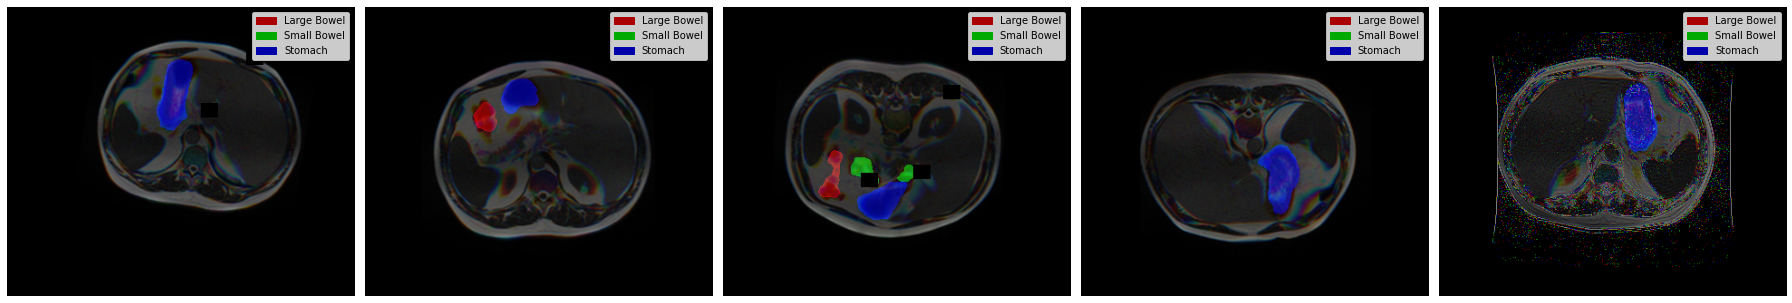

In [20]:
plot_batch(imgs, msks, size=5)

In [21]:
import gc
gc.collect()

13187

# 📦 Model


In [22]:
import segmentation_models_pytorch as smp

def build_model():
    '''
    model = smp.Unet(
        encoder_name=CFG.backbone,      # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
        encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
        in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
        classes=CFG.num_classes,        # model output channels (number of classes in your dataset)
        activation=None,
    )
    '''
    model=smp.Unet(
            encoder_name=CFG.backbone,      # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
            encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
            in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
            classes=3,        # model output channels (number of classes in your dataset)
            activation=None,
        )
    model.to(CFG.device)
    return model

def load_model(path):
    model = build_model()
    model.load_state_dict(torch.load(path))
    model.eval()
    return model

# 🔧 Loss Function

In [23]:
JaccardLoss = smp.losses.JaccardLoss(mode='multilabel')
DiceLoss    = smp.losses.DiceLoss(mode='multilabel')
BCELoss     = smp.losses.SoftBCEWithLogitsLoss()
LovaszLoss  = smp.losses.LovaszLoss(mode='multilabel', per_image=False)
TverskyLoss = smp.losses.TverskyLoss(mode='multilabel', log_loss=False)
Focal_loss=smp.losses.FocalLoss(mode='multilabel')
def iou_pos_coef(y_true, y_pred, thr=0.5, dim=(2,3), epsilon=0.001):
    #y_true_mask=y_true.view(y_true.shape[0],-1)==1
    
    y_true=y_true.view(y_true.shape[0],-1)
    t_sum = y_true.sum(-1)
    pos_index = torch.nonzero(t_sum >= 1)
    y_pred=y_pred.view(y_true.shape[0],-1)
    
    #y_true = y_true[y_true_mask]#.to(torch.float32)
    #y_true_mask=y_true==1
    #y_pred = (y_pred[y_true_mask]>thr).to(torch.float32) 
    y_pred = (y_pred >thr).to(torch.float32) 
    
    inter = (y_true*y_pred).sum(-1)##reduce along hw
    #print(inter.shape)
     
    union = (y_true + y_pred - y_true*y_pred).sum(dim=-1) ##reduce along hw: bs,c,n
    #iou = ((inter+epsilon)/(union+epsilon)).mean( )#1,0 same 0,1
    iou = ((inter+epsilon)/(union+epsilon))[pos_index.unsqueeze(-1)] #1,0 same 0,1
    
    #iou1 = ((inter+epsilon)/(union+epsilon)).mean(dim=(0,1))
    #print(iou.mean(),iou1.mean())
     
    return iou.mean()

def dice_pos_coef(y_true, y_pred, thr=0.5, dim=(2,3), epsilon=0.001):
    
    #y_true_mask=y_true.view(y_true.shape[0],-1)==1
    y_pred = (y_pred>thr).to(torch.float32)
    #y_pred=y_pred.reshape(y_true.size(0),3,2,y_pred.size(2),y_pred.size(3)).sum(dim=2).clip(0,1).float()
    #y_true=y_true.reshape(y_true.size(0),3,2,y_pred.size(2),y_pred.size(3)).sum(dim=2).clip(0,1).float()
    
    y_true=y_true.view(y_true.shape[0],-1)
    t_sum = y_true.sum(-1)
    pos_index = torch.nonzero(t_sum >= 1)
    y_pred=y_pred.view(y_true.shape[0],-1)
    
    #y_true = y_true[y_true_mask]
    #y_pred=  (y_pred[y_true_mask]>thr).to(torch.float32) 
    #print(y_true.shape,y_pred.shape)
    inter = (y_true*y_pred).sum(dim=-1)
    den = y_true.sum(dim=-1) + y_pred.sum(dim=-1)
    #dice = ((2*inter+epsilon)/(den+epsilon)).mean(dim=(1,0))
    #dice = ((2*inter+epsilon)/(den+epsilon)).mean( )
    dice = ((2*inter+epsilon)/(den+epsilon))[pos_index.unsqueeze(-1)]
    #print(dice.shape,pos_index.shape)
     
    #print(dice.shape)
    return dice.mean()

def dice_coef(y_true, y_pred, thr=0.5, dim=(2,3), epsilon=0.001):
    y_true = y_true.to(torch.float32)
    y_pred = (y_pred>thr).to(torch.float32)
    inter = (y_true*y_pred).sum(dim=dim)
    den = y_true.sum(dim=dim) + y_pred.sum(dim=dim)
    dice = ((2*inter+epsilon)/(den+epsilon)).mean(dim=(1,0))
    return dice

def iou_coef(y_true, y_pred, thr=0.5, dim=(2,3), epsilon=0.001):
    y_true = y_true.to(torch.float32)
    y_pred = (y_pred>thr).to(torch.float32)
    inter = (y_true*y_pred).sum(dim=dim)
    union = (y_true + y_pred - y_true*y_pred).sum(dim=dim)
    iou = ((inter+epsilon)/(union+epsilon)).mean(dim=(1,0))
    return iou

def criterion(y_pred, y_true):
    return 0.5*BCELoss(y_pred, y_true) + 0.5*TverskyLoss(y_pred, y_true)

def criterion(y_pred, y_true):
    #return 0.5*BCELoss(y_pred, y_true) + 0.5*TverskyLoss(y_pred, y_true)
    return 0.5*Focal_loss(y_pred, y_true) + 0.5*DiceLoss(y_pred, y_true)
    #return 0.25*BCELoss(y_pred, y_true) + 0.25*DiceLoss(y_pred, y_true)+0.5*Focal_loss(y_pred,y_true)
    #return   0.5*DiceLoss(y_pred, y_true)+0.5*Focal_loss(y_pred, y_true)#+0.2*LovaszLoss(y_pred,y_true)


# 🚄 Training Function

In [24]:
def train_one_epoch(model, optimizer, scheduler, dataloader, device, epoch):
    model.train()
    scaler = amp.GradScaler()
    
    dataset_size = 0
    running_loss = 0.0
    
    pbar = tqdm(enumerate(dataloader), total=len(dataloader), desc='Train ')
    for step, (images, masks) in pbar:         
        images = images.to(device, dtype=torch.float)
        masks  = masks.to(device, dtype=torch.float)
        
        batch_size = images.size(0)
        
        with amp.autocast(enabled=True):
            y_pred = model(images)
            loss   = criterion(y_pred, masks)
            loss   = loss / CFG.n_accumulate
            
        scaler.scale(loss).backward()
    
        if (step + 1) % CFG.n_accumulate == 0:
            scaler.step(optimizer)
            scaler.update()

            # zero the parameter gradients
            optimizer.zero_grad()

            if scheduler is not None:
                scheduler.step()
                
        running_loss += (loss.item() * batch_size)
        dataset_size += batch_size
        
        epoch_loss = running_loss / dataset_size
        
        mem = torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0
        current_lr = optimizer.param_groups[0]['lr']
        pbar.set_postfix(train_loss=f'{epoch_loss:0.4f}',
                        lr=f'{current_lr:0.5f}',
                        gpu_mem=f'{mem:0.2f} GB')
        torch.cuda.empty_cache()
        gc.collect()
    
    return epoch_loss

# 👀 Validation Function

In [25]:
@torch.no_grad()
def valid_one_epoch(model, dataloader, device, epoch):
    model.eval()
    
    dataset_size = 0
    running_loss = 0.0
    
    val_scores = []
    val_pos_scores=[]
    
    pbar = tqdm(enumerate(dataloader), total=len(dataloader), desc='Valid ')
    for step, (images, masks) in pbar:        
        images  = images.to(device, dtype=torch.float)
        masks   = masks.to(device, dtype=torch.float)
        
        batch_size = images.size(0)
        
        y_pred  = model(images)
        loss    = criterion(y_pred, masks)
        
        running_loss += (loss.item() * batch_size)
        dataset_size += batch_size
        
        epoch_loss = running_loss / dataset_size
        
        y_pred = nn.Sigmoid()(y_pred)
        val_dice = dice_coef(masks, y_pred).cpu().detach().numpy()
        val_jaccard = iou_coef(masks, y_pred).cpu().detach().numpy()
        val_scores.append([val_dice, val_jaccard])
        if masks.sum()>0:
            
            val_dice = dice_pos_coef(masks, y_pred).cpu().detach().numpy()
            val_jaccard = iou_pos_coef(masks, y_pred).cpu().detach().numpy()
            val_pos_scores.append([val_dice, val_jaccard])
        
        mem = torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0
        current_lr = optimizer.param_groups[0]['lr']
        pbar.set_postfix(valid_loss=f'{epoch_loss:0.4f}',
                        lr=f'{current_lr:0.5f}',
                        gpu_memory=f'{mem:0.2f} GB')
    val_scores  = np.mean(val_scores, axis=0)
     
    val_pos_scores=np.mean(val_pos_scores,axis=0)
    torch.cuda.empty_cache()
    gc.collect()
    torch.cuda.empty_cache()
    gc.collect()
    
    return epoch_loss, val_scores,val_pos_scores

# 🏃 Run Training

In [26]:
def run_training(model, optimizer, scheduler, device, num_epochs):
    # To automatically log gradients
    wandb.watch(model, log_freq=100)
    
    if torch.cuda.is_available():
        print("cuda: {}\n".format(torch.cuda.get_device_name()))
    
    start = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_dice      = -np.inf
    best_pos_dice=-np.inf
    best_epoch     = -1
    history = defaultdict(list)
    
    for epoch in range(1, num_epochs + 1): 
        gc.collect()
        print(f'Epoch {epoch}/{num_epochs}', end='')
        train_loss = train_one_epoch(model, optimizer, scheduler, 
                                           dataloader=train_loader, 
                                           device=CFG.device, epoch=epoch)
        '''
        val_loss, val_scores = valid_one_epoch(model, valid_loader, 
                                                 device=CFG.device, 
                                                 epoch=epoch)
        val_dice, val_jaccard = val_scores
    
        history['Train Loss'].append(train_loss)
        history['Valid Loss'].append(val_loss)
        history['Valid Dice'].append(val_dice)
        history['Valid Jaccard'].append(val_jaccard)
        
        # Log the metrics
        wandb.log({"Train Loss": train_loss, 
                   "Valid Loss": val_loss,
                   "Valid Dice": val_dice,
                   "Valid Jaccard": val_jaccard,
                   "LR":scheduler.get_last_lr()[0]})
        
        print(f'Valid Dice: {val_dice:0.4f} | Valid Jaccard: {val_jaccard:0.4f}')
        '''
        val_loss, val_scores,val_pos_scores = valid_one_epoch(model, valid_loader, 
                                                 device=CFG.device, 
                                                 epoch=epoch)
        val_dice, val_jaccard = val_scores
        val_dice_pos, val_jaccard_pos = val_pos_scores
        history['Train Loss'].append(train_loss)
        history['Valid Loss'].append(val_loss)
        history['Valid Dice'].append(val_dice)
        history['Valid Jaccard'].append(val_jaccard)
        history['Valid POS Jaccard'].append(val_jaccard_pos)
        history['Valid POS Dice'].append(val_dice_pos)
        # Log the metrics
        wandb.log({"Train Loss": train_loss, 
                   "Valid Loss": val_loss,
                   "Valid Dice": val_dice,
                   "Valid Jaccard": val_jaccard,
                   "Valid pos Jaccard": val_jaccard_pos,
                    "Valid pos Dice": val_dice_pos,
                   "LR":scheduler.get_last_lr()[0]})
        
        print(f'Valid Dice: {val_dice:0.4f} | Valid Jaccard: {val_jaccard:0.4f}')
        print(f'Valid Pos Dice: {val_dice_pos:0.4f} | Valid Pos Jaccard: {val_jaccard_pos:0.4f}')
        
        
        # deep copy the model
        if val_dice_pos >= best_pos_dice :# or val_dice >= best_dice:
            if val_dice>=best_dice:
                
                print(f"{c_}Valid Score Improved ({best_dice:0.4f} ---> {val_dice:0.4f})")
                best_dice    = val_dice
                best_jaccard = val_jaccard
            
            print(f"{c_}Valid Pos Score Improved ({best_pos_dice:0.4f} ---> {val_dice_pos:0.4f})")
            best_pos_dice    = val_dice_pos
            best_pos_jaccard = val_jaccard_pos
                
            best_epoch   = epoch
            run.summary["Best Dice"]    = best_dice
            run.summary["Best Pos Dice"]    = best_pos_dice
            run.summary["Best Jaccard"] = best_jaccard
            run.summary["Best Pos Jaccard"] = best_pos_jaccard
            run.summary["Best Epoch"]   = best_epoch
            best_model_wts = copy.deepcopy(model.state_dict())
            PATH = f"best_epoch-{fold:02d}.bin"
            torch.save(model.state_dict(), PATH)
            # Save a model file from the current directory
            wandb.save(PATH)
            print(f"Model Saved{sr_}")
            
        last_model_wts = copy.deepcopy(model.state_dict())
        PATH = f"last_epoch-{fold:02d}.bin"
        torch.save(model.state_dict(), PATH)
            
        print(); print()
    
    end = time.time()
    time_elapsed = end - start
    print('Training complete in {:.0f}h {:.0f}m {:.0f}s'.format(
        time_elapsed // 3600, (time_elapsed % 3600) // 60, (time_elapsed % 3600) % 60))
    print("Best Score: {:.4f}".format(best_jaccard))
    
    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model, history

# 🔍 Optimizer

<img src="https://mlfromscratch.com/content/images/2019/12/saddle.gif" width=500>

In [27]:
def fetch_scheduler(optimizer):
    if CFG.scheduler == 'CosineAnnealingLR':
        scheduler = lr_scheduler.CosineAnnealingLR(optimizer,T_max=CFG.T_max, 
                                                   eta_min=CFG.min_lr)
    elif CFG.scheduler == 'CosineAnnealingWarmRestarts':
        scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=CFG.T_0, 
                                                             eta_min=CFG.min_lr)
    elif CFG.scheduler == 'ReduceLROnPlateau':
        scheduler = lr_scheduler.ReduceLROnPlateau(optimizer,
                                                   mode='min',
                                                   factor=0.1,
                                                   patience=7,
                                                   threshold=0.0001,
                                                   min_lr=CFG.min_lr,)
    elif CFG.scheduer == 'ExponentialLR':
        scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.85)
    elif CFG.scheduler == None:
        return None
        
    return scheduler

In [28]:
model = build_model()
optimizer = optim.Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.wd)
scheduler = fetch_scheduler(optimizer)

In [29]:
p=torch.randn(3000).numpy()
np.percentile(p,(50,90))


array([-0.00258571,  1.28628489])

# 🚅 Training

In [ ]:
for fold in CFG.folds:
    print(f'#'*15)
    print(f'### Fold: {fold}')
    print(f'#'*15)
    run = wandb.init(project='uw-maddison-gi-tract', 
                     config={k:v for k, v in dict(vars(CFG)).items() if '__' not in k},
                     anonymous=anonymous,
                     name=f"fold-{fold}|dim-{CFG.img_size[0]}x{CFG.img_size[1]}|model-{CFG.model_name}",
                     group=CFG.comment,
                    )
    train_loader, valid_loader = prepare_loaders(fold=fold, debug=CFG.debug)
    model     = build_model()
    optimizer = optim.Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.wd)
    scheduler = fetch_scheduler(optimizer)
    model, history = run_training(model, optimizer, scheduler,
                                  device=CFG.device,
                                  num_epochs=CFG.epochs)
    run.finish()
    display(ipd.IFrame(run.url, width=1000, height=720))

###############
### Fold: 3
###############


wandb: Currently logged in as: anony-mouse-275604. Use `wandb login --relogin` to force relogin


cuda: Tesla T4

Epoch 1/15

Valid : 100%|██████████| 77/77 [00:55<00:00,  1.39it/s, gpu_memory=4.60 GB, lr=0.00052, valid_loss=0.1825]


Valid Dice: 0.8233 | Valid Jaccard: 0.7885
Valid Pos Dice: 0.6366 | Valid Pos Jaccard: 0.5017
Valid Score Improved (-inf ---> 0.8233)
Valid Pos Score Improved (-inf ---> 0.6366)
Model Saved


Epoch 2/15

Valid : 100%|██████████| 77/77 [00:54<00:00,  1.42it/s, gpu_memory=4.62 GB, lr=0.00016, valid_loss=0.1481]


Valid Dice: 0.8730 | Valid Jaccard: 0.8397
Valid Pos Dice: 0.7242 | Valid Pos Jaccard: 0.6010
Valid Score Improved (0.8233 ---> 0.8730)
Valid Pos Score Improved (0.6366 ---> 0.7242)
Model Saved


Epoch 3/15

Train :  76%|███████▋  | 238/312 [13:06<04:17,  3.47s/it, gpu_mem=13.81 GB, lr=0.00113, train_loss=0.1436]

sss

focal+dice loss Unet Valid Dice: 0.9116 | Valid Jaccard: 0.8826
Valid Pos Dice: 0.7889 | Valid Pos Jaccard: 0.6870
Valid Score Improved (0.9045 ---> 0.9116)
Valid Pos Score Improved (0.7663 ---> 0.7889)
Model Saved
Last epoch
Valid Dice: 0.9145 | Valid Jaccard: 0.8852
Valid Pos Dice: 0.8022 | Valid Pos Jaccard: 0.7011
Valid Score Improved (0.9116 ---> 0.9145)
Valid Pos Score Improved (0.7889 ---> 0.8022)
Model Saved


Valid Pos Dice: 0.7433 | Valid Pos Jaccard: 0.6306
Valid Score Improved (0.8847 ---> 0.8890)
Valid Pos Score Improved (0.7167 ---> 0.7433)

focal loss 0.5 and dice loss 0.5
Best Dice	0.88939
Best Epoch	4
Best Jaccard	0.85735
Best Pos Dice	0.77278
Best Pos Jaccard	0.6597

In [ ]:
!cp ../input/uwmgi-2-5d-train-jai/*.bin /kaggle/working/

# 🔭 Prediction

In [ ]:
test_dataset = BuildDataset(df.query("fold==0 & empty==0").sample(frac=1.0), label=False, 
                            transforms=data_transforms['valid'])
test_loader  = DataLoader(test_dataset, batch_size=5, 
                          num_workers=4, shuffle=False, pin_memory=True)
imgs = next(iter(test_loader))
imgs = imgs.to(CFG.device, dtype=torch.float)

preds = []
for fold in CFG.folds:
    model = load_model(f"best_epoch-{fold:02d}.bin")
    with torch.no_grad():
        pred = model(imgs)
        pred = (nn.Sigmoid()(pred)>0.5).double()
    preds.append(pred)
    
imgs  = imgs.cpu().detach()
preds = torch.mean(torch.stack(preds, dim=0), dim=0).cpu().detach()

In [ ]:
plot_batch(imgs, preds, size=5)

# ✂️ Remove Files

In [ ]:
!rm -r ./wandb